<a href="https://colab.research.google.com/github/gitnicolas343/Quamtum_machine_learning/blob/main/quamtum_gates.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
!pip install Qiskit --quiet
!pip install pylatexenc --quiet
from pylatexenc.latex2text import LatexNodes2Text
from qiskit import QuantumCircuit
from qiskit.circuit.library import XGate, HGate, MCXGate, CXGate
from qiskit import QuantumCircuit
from qiskit.visualization import plot_bloch_vector
from qiskit.quantum_info import Statevector
import matplotlib.pyplot as plt


# Sistemas cuánticos cerrados y transformaciones unitarias

---

En el estudio de la computación cuántica, es fundamental comprender cómo evoluciona el estado de un qubit cuando se encuentra en un sistema cerrado, es decir, aislado de cualquier interacción con el entorno externo, como un aparato de medición. Esta evolución está regida por principios físicos que imponen ciertas restricciones: debe ser lineal y reversible.

La linealidad, aunque puede parecer una simplificación sorprendente, ha sido confirmada repetidamente por la experimentación. Por otro lado, la reversibilidad se relaciona directamente con la conservación de la información: un sistema cerrado no puede destruir información sin la intervención de un agente externo. Según el principio de Landauer, borrar un bit de información requiere una cantidad mínima de energía proporcional a la temperatura del entorno. Por ello, si el sistema permanece cerrado, no puede haber pérdida de información ni entrada de energía, lo que implica que todas sus transformaciones deben ser reversibles.

el unico estado determinista que transforma un bit clasico (Cbit)  en otro Cbit es la operacion NOT y se define por la asignacion logica:

$$0 \mapsto \bar{0} = 1$$  
$$ 1 \mapsto \bar{1} = 0$$

donde la notación con barra indica negación lógica. La operación NOT puede resumirse como:
$$
x \mapsto \bar{x} = x \oplus 1,
$$
donde $\oplus$ denota la suma módulo 2 (XOR).

La matriz Pauli-X se define como:

$$
X = \begin{pmatrix}0 & 1 \\1 & 0\end{pmatrix}
$$

Esta matriz intercambia los estados básicos $|0\rangle$, $|1\rangle$ , veamos:


$$
|0\rangle = \begin{pmatrix} 1 \\ 0 \end{pmatrix}, \quad
|1\rangle = \begin{pmatrix} 0 \\ 1 \end{pmatrix}
$$

Entonces:

$$
X|0\rangle = \begin{pmatrix}0 & 1 \\1 & 0\end{pmatrix}\begin{pmatrix}1 \\0\end{pmatrix}=\begin{pmatrix}0 \\1\end{pmatrix}= |1\rangle
$$

$$
X|1\rangle = \begin{pmatrix}0 & 1 \\1 & 0\end{pmatrix}\begin{pmatrix}0 \\1\end{pmatrix}=\begin{pmatrix}1 \\0\end{pmatrix}= |0\rangle
$$

El estado del cbit en la salida de una operación NOT está dado por el vector de amplitud one-hot

$$
X|x\rangle = |\bar{x}\rangle = |x \oplus 1\rangle \tag{1.29}
$$

El símbolo  $\oplus$ denota la suma módulo 2 o operación XOR, que devuelve 1 si los bits son diferentes y 0 si son iguales.

Así:

* Si $ x = 0 $, entonces $ X|0\rangle = |1\rangle $
* Si $ x = 1 $, entonces $ X|1\rangle = |0\rangle $

Esto muestra que la compuerta Pauli-X invierte el estado del qubit, de manera análoga a la compuerta NOT clásica, pero en el contexto de una operación lineal reversible y unitaria.

#Algunas ropiedades:

---
1.La propiedad unitaria de la matriz de Pauli-X  cumpe que:

$$
XX^\dagger = X^\dagger X = I
$$
2.Cualquier transformación reversible sobre un qubit se representa por una matriz unitaria $U$ que cumple:

$$
UU^\dagger = UU^\dagger = I
$$

Lo cual implica que $U^{-1} = U^\dagger$ y ademas preserva la norma del vector de estado:

$$
\|U|\psi\rangle\|^2 = \langle \psi | U^\dagger U | \psi \rangle = \langle \psi | \psi \rangle = 1
$$

Esto garantiza que los estados cuánticos transformados sigan siendo válidos (con norma 1).

---

## *Transformaciones unitarias en sistemas cuánticos*

En mecánica cuántica, la evolución de un qubit en un sistema cerrado se describe mediante una transformación unitaria. Esto significa que, si el qubit está inicialmente en el estado $|\psi\rangle$, después de aplicarle una matriz unitaria $U$, su nuevo estado es:

$$|\psi'\rangle = U|\psi\rangle\quad$$

Esto refleja dos propiedades fundamentales, Linealidad ya que la operación $U$ es lineal, así que respeta la suma y el producto escalar.Reversibilidad: como $U$ es una matriz unitaria, su inversa es su conjugada transpuesta, $U^{-1} = U^\dagger$.


Dado que $U$ es reversible, se puede recuperar el estado original $|\psi\rangle$ aplicando su inversa, es decir:

$$
|\psi\rangle = U^\dagger |\psi'\rangle
$$

Esto es importante puesto que  en un sistema cerrado, la información cuántica no se pierde por lo que  toda evolución es reversible.

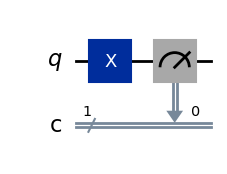

In [36]:
qc = QuantumCircuit(1,1)
qc.x(0)
qc.x(0)
qc.measure(0,0)
qc.draw("mpl")
